In [79]:
#libs
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
#declare da placement

os.listdir()

['anothertest.ipynb',
 'b1797683-c5b0-4e97-968e-8605a009b1ab.zip',
 'c3ff606d-2eda-4ce6-9274-4b9a14abaa84.zip',
 'Datasets',
 'Getting Started.ipynb',
 'IMGClass',
 'Logs',
 'Model',
 'Python Ilt Session.py',
 'test2.ipynb',
 'testboof.ipynb',
 'tsjsCourse',
 'TutsDataset',
 'TutsDatasetV2']

In [66]:
#dataload
base_path = "TutsDatasetV2"
os.makedirs(os.path.join(base_path, "training"))
os.makedirs(os.path.join(f'{base_path}/training', "dogs"))
os.makedirs(os.path.join(f'{base_path}/training', "cats"))
os.makedirs(os.path.join(base_path, "validation"))
os.makedirs(os.path.join(f'{base_path}/validation', "dogs"))
os.makedirs(os.path.join(f'{base_path}/validation', "cats"))
print(os.listdir(base_path))

['Cats', 'Dogs', 'training', 'validation']


In [67]:
Cat_SRC = "TutsDatasetV2/Cats/"
Dog_SRC = "TutsDatasetV2/Dogs/"
Train_Dir = "TutsDatasetV2/training/"
Valid_Dir = "TutsDatasetV2/validation/"
Cat_Train_Dir = "TutsDatasetV2/training/cats/"
Dog_Train_Dir = "TutsDatasetV2/training/dogs/"
Cat_Val_Dir = "TutsDatasetV2/validation/cats/"
Dog_Val_Dir = "TutsDatasetV2/validation/dogs/"

In [68]:
if len(os.listdir(Cat_Train_Dir)) > 0:
  for file in os.scandir(Cat_Train_Dir):
    os.remove(file.path)
if len(os.listdir(Dog_Train_Dir)) > 0:
  for file in os.scandir(Dog_Train_Dir):
    os.remove(file.path)
if len(os.listdir(Cat_Val_Dir)) > 0:
  for file in os.scandir(Cat_Val_Dir):
    os.remove(file.path)
if len(os.listdir(Dog_Val_Dir)) > 0:
  for file in os.scandir(Dog_Val_Dir):
    os.remove(file.path)

In [69]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file)>0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")
  
  train_length = int(len(files)*SPLIT_SIZE)
  test_length = int(len(files)-train_length)
  shuffle_set = random.sample(files, len(files))
  train_set = shuffle_set[0:train_length]
  test_set = shuffle_set[-test_length:]

  for filename in train_set:
    this_file = SOURCE_DIR + filename
    destination = TRAINING_DIR + filename
    shutil.copyfile(this_file, destination)

  for filename in test_set:
    this_file = SOURCE_DIR + filename
    destination = VALIDATION_DIR + filename
    shutil.copyfile(this_file, destination)

In [70]:
split_size = .6

In [71]:
split_data(Cat_SRC, Cat_Train_Dir, Cat_Val_Dir, split_size)
split_data(Dog_SRC, Dog_Train_Dir, Dog_Val_Dir, split_size)

In [72]:
print(f"TrainCat = {len(os.listdir(Cat_Train_Dir))}")
print(f"TrainDog = {len(os.listdir(Dog_Train_Dir))}")
print(f"CatVal = {len(os.listdir(Cat_Val_Dir))}")
print(f"DogVal = {len(os.listdir(Dog_Val_Dir))}")

TrainCat = 51
TrainDog = 52
CatVal = 34
DogVal = 35


In [73]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1./255)
  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [82]:
train_generator, valid_generator = train_val_generators(Train_Dir, Valid_Dir)

Found 103 images belonging to 2 classes.
Found 69 images belonging to 2 classes.


In [83]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

In [84]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer="Adam", loss= "binary_crossentropy", metrics=["accuracy"])

In [85]:
history =  model.fit(train_generator, epochs=20, validation_data=valid_generator)

c:\Users\Diaz R\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/20
2/2 [==============================] - 6s 3s/step - loss: 0.6730 - accuracy: 0.5340 - val_loss: 7.8337 - val_accuracy: 0.4928
Epoch 2/20
2/2 [==============================] - 4s 1s/step - loss: 7.7000 - accuracy: 0.4951 - val_loss: 2.2201 - val_accuracy: 0.5072
Epoch 3/20
2/2 [==============================] - 4s 4s/step - loss: 2.0188 - accuracy: 0.5049 - val_loss: 0.7053 - val_accuracy: 0.5942
Epoch 4/20
2/2 [==============================] - 4s 4s/step - loss: 1.2017 - accuracy: 0.5243 - val_loss: 1.3769 - val_accuracy: 0.4928
Epoch 5/20
2/2 [==============================] - 4s 2s/step - loss: 1.1534 - accuracy: 0.5340 - val_loss: 0.8355 - val_accuracy: 0.5072
Epoch 6/20
2/2 [==============================] - 4s 4s/step - loss: 1.1324 - accuracy: 0.5049 - val_loss: 1.2910 - val_accuracy: 0.5072
Epoch 7/20
2/2 [==============================] - 4s 4s/step - loss: 1.1085 - accuracy: 0.5049 - val_loss: 1.0034 - val_accuracy: 0.5072
Epoch 8/20
2/2 [=========================

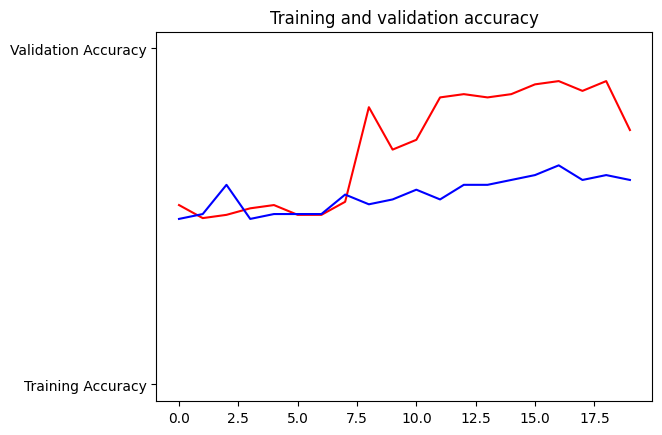

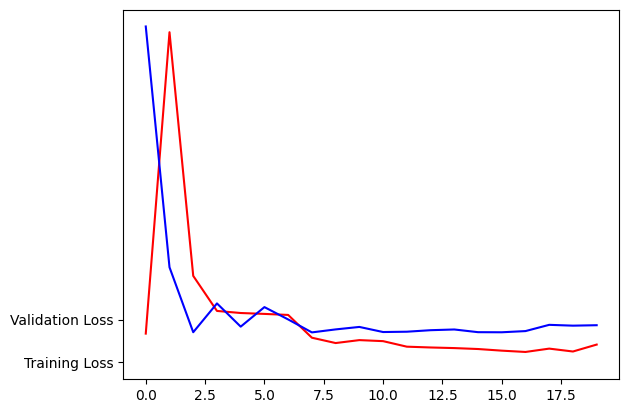

In [86]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [88]:
model.save("Model/Testmodel2")

INFO:tensorflow:Assets written to: Model/Testmodel2\assets


INFO:tensorflow:Assets written to: Model/Testmodel2\assets
